In [59]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import random

#loading the data into a dataframe
df = pd.read_csv('weather.csv')
df.head(12)

,Day,MaxTemp,Rainfall,Evaporation
0,1,24.3,0.0,3.4
1,2,26.9,3.6,4.4
2,3,23.4,3.6,5.8
3,4,15.5,39.8,7.2
4,5,16.1,2.8,5.6
5,6,16.9,0.0,5.8
6,7,18.2,0.2,4.2
7,8,17.0,0.0,5.6
8,9,19.5,0.0,4.0
9,10,22.8,16.2,5.4


In [60]:
#selecting random entries
l  = []
for i in range(10,300,90):
  l.append(random.randint(i,i+90))
x_plot = l
print(l)


[100, 185, 244, 352]


Linear Interpolation(Newton method)

In [61]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])    
    return coef

In [62]:
def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

Fortnightly data

[0.8234557109557272, 2.819280719280709, 1.2744255744255764, 5.437162837162848]
3.1548899879626653


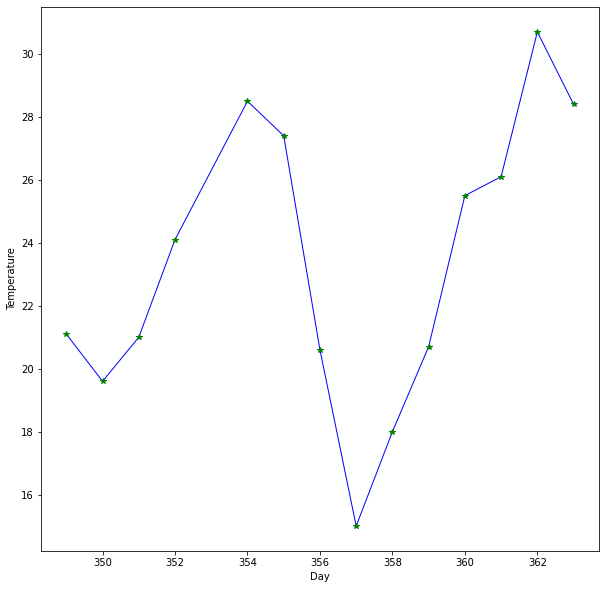

In [63]:
#fortnightly data
df2 = df
l2 = []
l3 = []
err = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e5 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
print(e5)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
plt.plot(x1,y,color ='b',linewidth=1)
plt.plot(x1,y,'g*')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()



In [64]:
df = pd.read_csv('weather.csv')

In [65]:
#Error on taking the entire dataset rather than intervals
df2 = df
l2 = []
l3 = []
err = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'])
  y = list(df2['MaxTemp'])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e_all = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
print(e_all)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))



[1.2852585832200677e+31, 1.1719441580487066e+70, 9.12621348786257e+104, 5.407501374966567e+161]
inf


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:442: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Weekly data

In [66]:
df = pd.read_csv('weather.csv')

In [67]:
df2 = df
#weekly data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e1 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e1


1.4332220333309833


[1.3399999999999928, 2.41714285714286, 0.7047619047619058, 0.28571428571430246]

In [68]:
df = pd.read_csv('weather.csv')

In [69]:
df2 = df
#10 day data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e9 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e9


3.459132229301656


[1.1984126984126995, 3.030000000000001, 0.6433333333333362, 6.068888888888903]

In [70]:
df = pd.read_csv('weather.csv')

In [71]:
df2 = df
#2 day data
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  a_s = divided_diff(x1, y)[0, :]
  y_new = newton_poly(a_s, x1, x)
  l3.append(y_new)
e13 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e13


5.514653774263639


[0.5999999999999979, 3.6750000000000007, 3.6999999999999975, 9.700000000000042]

Lagrange Interpolation

In [72]:
def Lagrange_Interpolation(x,y,x_find):
  n = len(x)
  y_find = 0
  for i in range(n):
    p = 1
    for j in range(n):
      if i != j:
        p = p * (x_find - x[j])/(x[i] - x[j])
    y_find = y_find + p*y[i]
  return y_find

Fortnightly data

In [73]:
df = pd.read_csv('weather.csv')

3.15488998796268


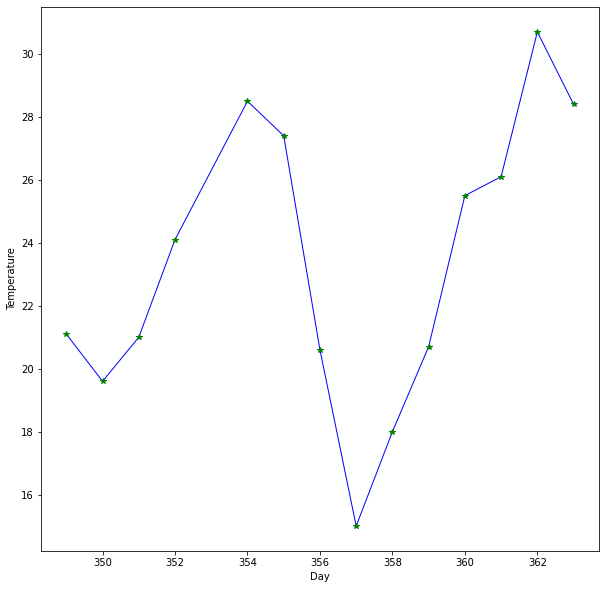

In [74]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e6 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e6
plt.plot(x1,y,color ='b',linewidth=1)
plt.plot(x1,y,'g*')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

Weekly data

In [75]:
df = pd.read_csv('weather.csv')

In [76]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e2 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e2

1.4332220333309826


[1.3399999999999963,
 2.4171428571428564,
 0.7047619047619094,
 0.28571428571429536]

In [77]:
df = pd.read_csv('weather.csv')

In [78]:
#2 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e14 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e14

5.51465377426362


[0.5999999999999979, 3.6750000000000007, 3.6999999999999975, 9.7]

In [79]:
df = pd.read_csv('weather.csv')

In [80]:
#10 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x = df2['Day'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x1 = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = Lagrange_Interpolation(x1, y, x)
  l3.append(y_new)
e10 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e10

3.4591322293016544


[1.1984126984126995, 3.0300000000000082, 0.6433333333333362, 6.068888888888896]

Cubic Spline method

In [81]:
def jacobi(A, b, x0, tol, n_iterations=300):
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations): #iteration level
        for i in range(0, n): #element wise level for x
            s = 0
            for j in range(0,n): #summation for i !=j
                if i != j:
                    s += A[i,j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i,i]
        #update values
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() #use new x for next iteration
    return x

In [82]:
def cubic_spline(x, y, tol = 1e-100):
    x = np.array(x)
    y = np.array(y)
    ### check if sorted
    if np.any(np.diff(x) < 0):
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]

    size = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    
    ### Get matrix A
    A = np.zeros(shape = (size,size))
    b = np.zeros(shape=(size,1))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,size-1):
        A[i, i-1] = delta_x[i-1]
        A[i, i+1] = delta_x[i]
        A[i,i] = 2*(delta_x[i-1]+delta_x[i])
    ### Get matrix b
        b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])
        
    ### Solves for c in Ac = b
    c = jacobi(A, b, np.zeros(len(A)), tol = tol, n_iterations=1000)
    
    ### Solves for d and b
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b.squeeze(), c.squeeze(), d.squeeze()

In [83]:
def polynomial(x,y,x1,p,a):
  l = cubic_spline(x, y, tol = 1e-100)
  y1 = a + l[0][p-1]*(x1-x[p-1]) + l[1][p-1]*(x1-x[p-1])**2 + l[2][p-1]*(x1-x[p-1])**3
  return y1

Weekly data

In [84]:
df = pd.read_csv('weather.csv')

In [85]:

df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = polynomial(x,y,x1,4,a)
  l3.append(y_new)
e3 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e3

18.75730784821337


[0.019821634062143545, 3.3879746835443, 14.766862514688592, 34.31919866444085]

In [86]:
df = pd.read_csv('weather.csv')

In [87]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = polynomial(x,y,x1,5,a)
  l3.append(y_new)
e11 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e11

20.183675054215712


[0.12494226327944702,
 3.6227345062328684,
 14.811315617633054,
 37.376571118546096]

In [88]:
df = pd.read_csv('weather.csv')

In [89]:
#4 day data
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = polynomial(x,y,x1,2,a)
  l3.append(y_new)
e15 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e15

26.82393415451063


[0.25000000000000355,
 1.8695652173913029,
 14.839999999999991,
 51.52000000000008]

Fortnightly data

In [90]:
df = pd.read_csv('weather.csv')

In [91]:

df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = polynomial(x,y,x1,7,a)
  l3.append(y_new)
e7 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e7

20.32847116268781


[0.125891228651966, 3.6414875355941945, 14.768089513289874, 37.70429963947133]

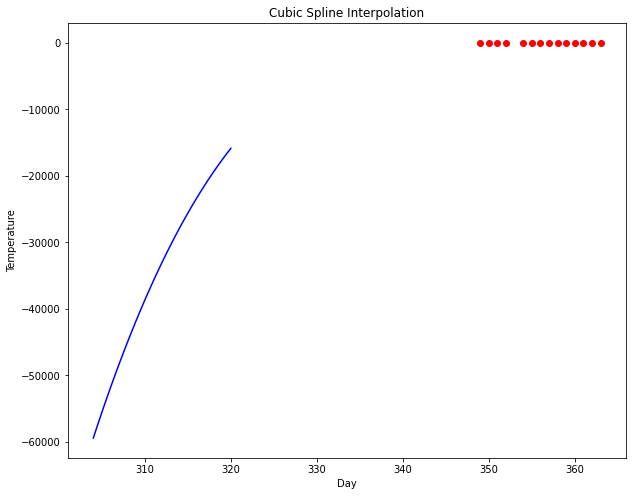

In [92]:
from scipy.interpolate import CubicSpline

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(304, 320, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.show()

In [93]:
def LeastSq(x,y,x1):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  n = len(x)
  numer = 0
  denom = 0
  for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
  y = m*x1 + c
  return y

Fortnightly

In [94]:
df = pd.read_csv('weather.csv')

2.216256749878952


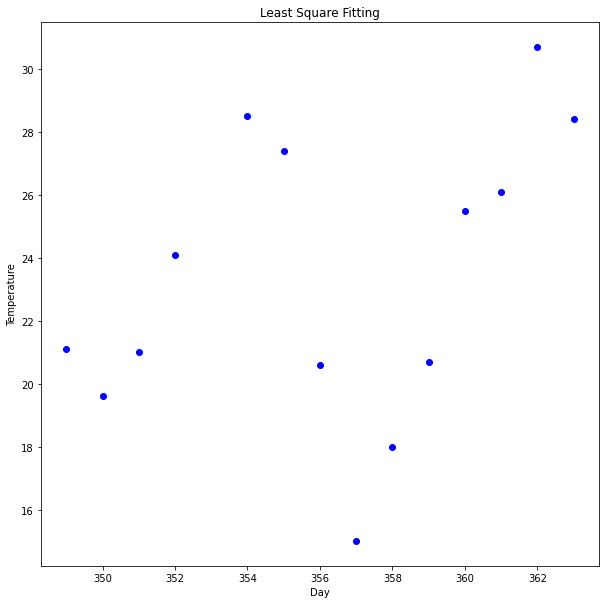

In [95]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-7:l[j]+7])
  y = list(df2['MaxTemp'][l[j]-7:l[j]+7])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e8 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e8
plt.title('Least Square Fitting')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.scatter(x,y,color ='b',linewidth=1)
plt.show()

Weekly

In [96]:
df = pd.read_csv('weather.csv')

In [97]:
df2 = df
l2 = []
l3 = []
err = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-4:l[j]+3])
  y = list(df2['MaxTemp'][l[j]-4:l[j]+3])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e4 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e4

1.629303417916075


[3.0671232876712367,
 0.1767123287671133,
 0.0478260869565279,
 1.0852459016393148]

In [98]:
df = pd.read_csv('weather.csv')

In [99]:
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-2:l[j]+2])
  y = list(df2['MaxTemp'][l[j]-2:l[j]+2])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
e16 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e16

4.116867741378211


[2.3999999999999986, 0.9000000000000021, 2.5999999999999712, 7.380000000000155]

In [100]:
df = pd.read_csv('weather.csv')

In [101]:
#10day
df2 = df
l2 = []
l3 = []
for j in range(len(l)):
  x1 = df2['Day'][l[j]]
  a = df2['MaxTemp'][l[j]]
  df1 = df2
  l2.append(df2['MaxTemp'][l[j]])
  df1.drop(l[j],inplace =True)
  df1 = df1.reset_index()
  x = list(df2['Day'][l[j]-5:l[j]+5])
  y = list(df2['MaxTemp'][l[j]-5:l[j]+5])
  y_new = LeastSq(x,y,x1)
  l3.append(y_new)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(l2, l3, squared=False))
e12 = [abs(x1 - x2) for (x1, x2) in zip(l2, l3)]
e12

1.4928963391801853


[2.3599999999999994, 0.3151515151515163, 0.4770833333333204, 1.73736263736264]

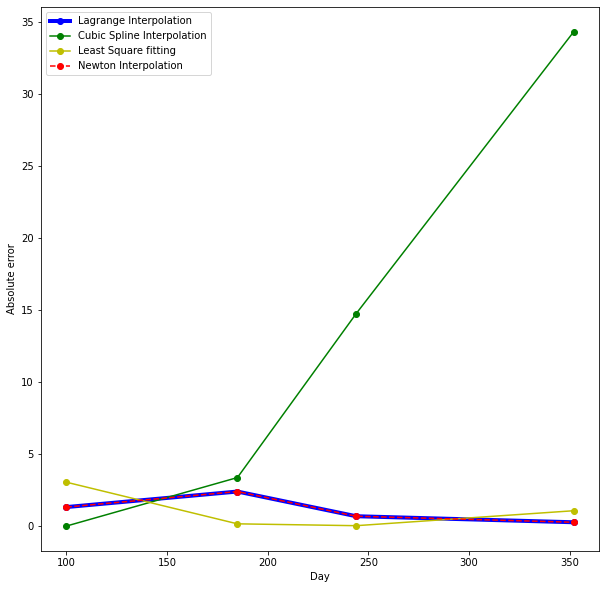

In [102]:
#Weekly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e2, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e3, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e4, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e1, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

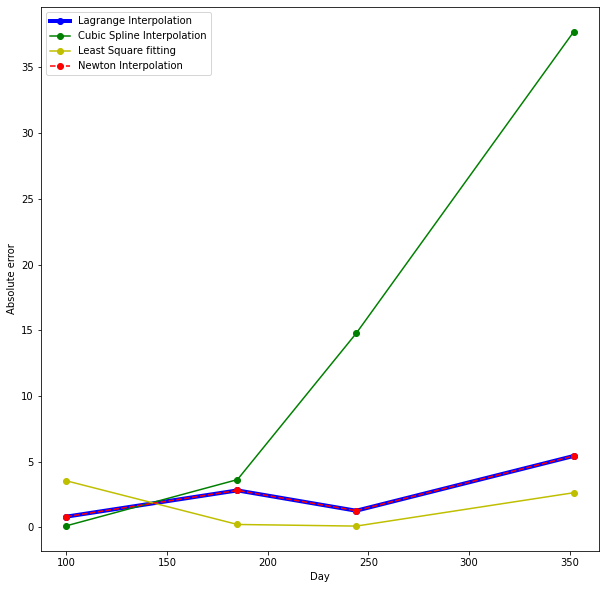

In [103]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e6, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e7, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e8, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e5, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend();
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

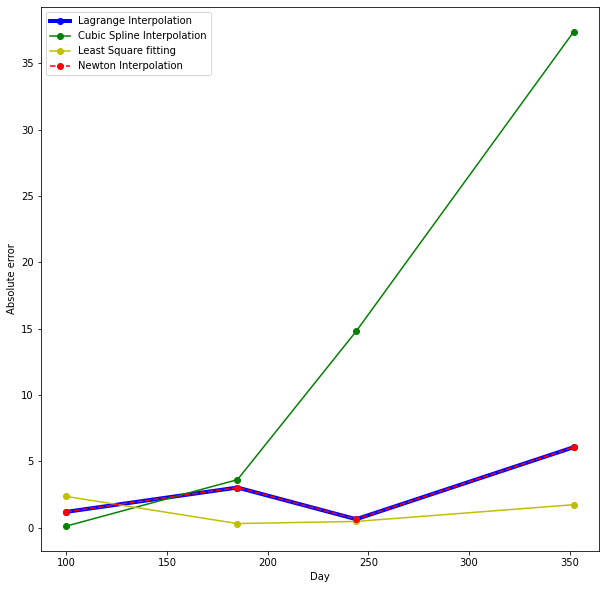

In [104]:
#10 data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e10, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e11, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e12, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e9, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

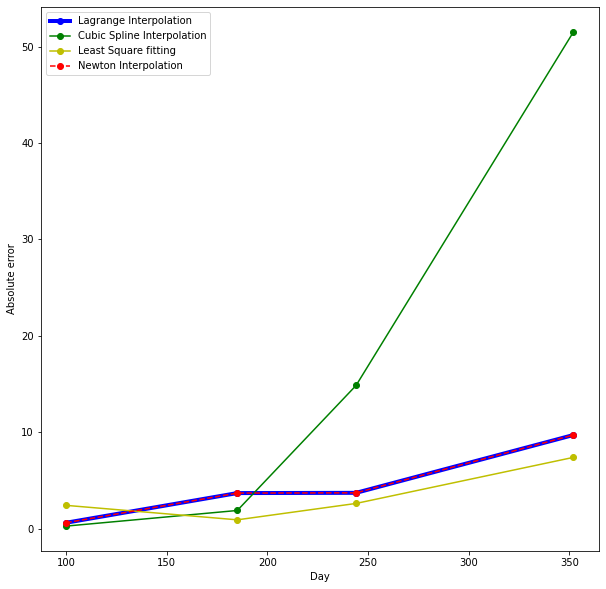

In [105]:
#4 data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)



 # plotting t, a separately 
plt.plot(x_plot, e14, marker = 'o',color ='b',linewidth=4,label = 'Lagrange Interpolation' ) # plotting t, b separately 
plt.plot(x_plot, e15, marker = 'o',color = 'g',label = 'Cubic Spline Interpolation')
plt.plot(x_plot,e16, marker = 'o',color ='y',label ='Least Square fitting') 
plt.plot(x_plot, e13, marker = 'o',color = 'r',linestyle='--',label = 'Newton Interpolation')# plotting t, c separately 
leg = plt.legend()
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

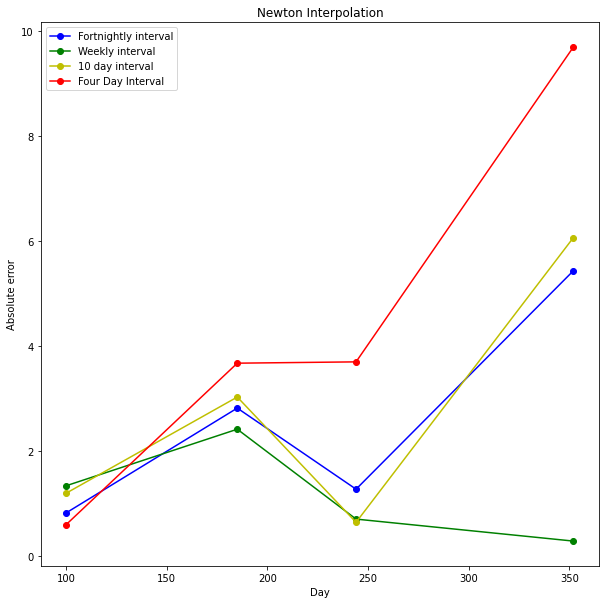

In [106]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e5, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e1, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e9, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e13, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Newton Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

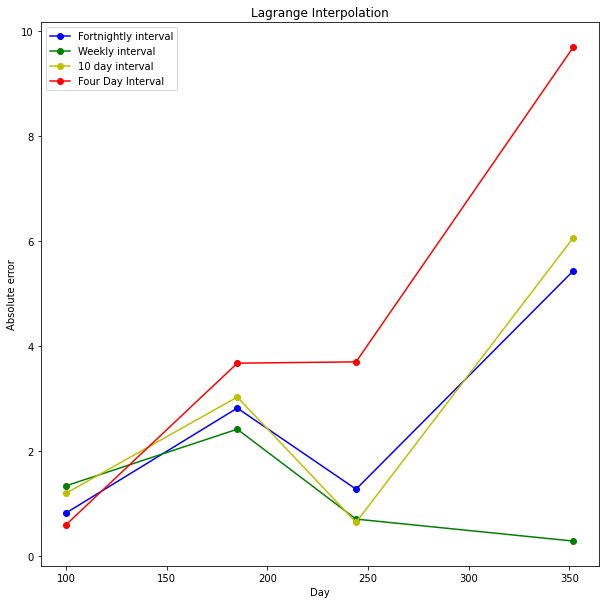

In [107]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e6, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e2, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e10, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e14, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Lagrange Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

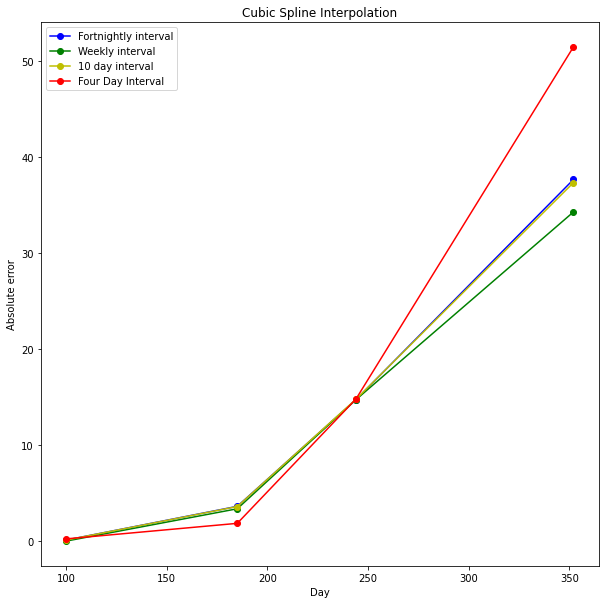

In [108]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e7, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e3, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e11, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e15, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Cubic Spline Interpolation")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()

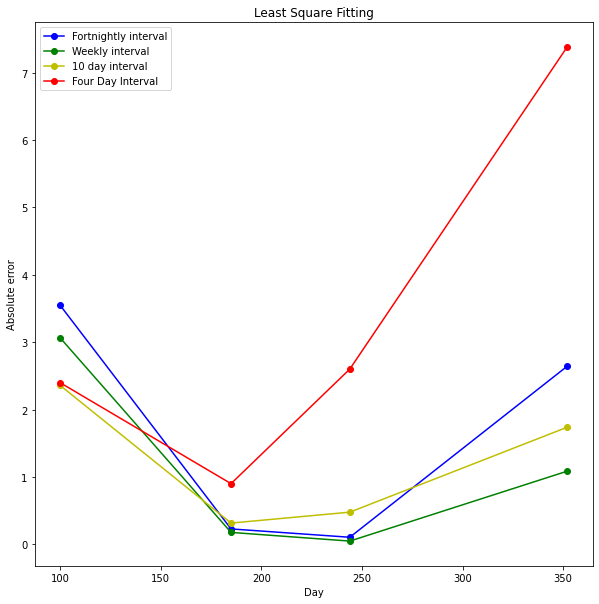

In [109]:
#Fortnightly data plot for different method
from numpy import *
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(x_plot, e8, marker = 'o',color ='b',label = 'Fortnightly interval' ) # plotting t, b separately 
plt.plot(x_plot, e4, marker = 'o',color = 'g',label = 'Weekly interval')
plt.plot(x_plot,e12, marker = 'o',color ='y',label ='10 day interval') 
plt.plot(x_plot, e16, marker = 'o',color = 'r',label = 'Four Day Interval')# plotting t, c separately 
leg = plt.legend()
plt.title("Least Square Fitting")
plt.xlabel("Day")
plt.ylabel("Absolute error")
plt.show()